<center><h1><title>Henry's notebook for Stats for Data Science Assignment</title></h1>
    <br>
<h2>A Notebook sample for the Boston housing market.</h2></center>

Install all of these to be safe.

In [101]:
#install everything!
%pip install pandas
%pip install numpy
%pip install scipy
%pip install seaborn
%pip install matplotlib
%pip install statsmodels

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip available: 22.3.1 -> 23.0
[notice] To update, run: python.exe -m pip install --upgrade pip


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip available: 22.3.1 -> 23.0
[notice] To update, run: python.exe -m pip install --upgrade pip


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip available: 22.3.1 -> 23.0
[notice] To update, run: python.exe -m pip install --upgrade pip


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip available: 22.3.1 -> 23.0
[notice] To update, run: python.exe -m pip install --upgrade pip


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip available: 22.3.1 -> 23.0
[notice] To update, run: python.exe -m pip install --upgrade pip


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip available: 22.3.1 -> 23.0
[notice] To update, run: python.exe -m pip install --upgrade pip


Gonna do the numpy and Pandas bit plus statsmodels.

In [102]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
import scipy.stats as sci
import seaborn as sns
import seaborn.objects as so
from math import sqrt

Boston housing info!

In [103]:
boston_url = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ST0151EN-SkillsNetwork/labs/boston_housing.csv'

boston_df=pd.read_csv(boston_url)
boston_df.reset_index()


,index,Unnamed: 0,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV
0,0,0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,4.98,24.0
1,1,1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,9.14,21.6
2,2,2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,4.03,34.7
3,3,3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,2.94,33.4
4,4,4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,501,501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,9.67,22.4
502,502,502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,9.08,20.6
503,503,503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,5.64,23.9
504,504,504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,6.48,22.0


In [104]:
#run to display info.
boston_df.head()

,Unnamed: 0,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV
0,0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,4.98,24.0
1,1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,9.14,21.6
2,2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,4.03,34.7
3,3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,2.94,33.4
4,4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,5.33,36.2


To save time and for the purposes of presentation, Discretising the age variable (AGE) of owner-occupied units into three groups for Task 4, Figure 3 and Task 5, Question 2 is done here along with a Levene test on to test for equality of variance.

In [105]:
#First, group the three variables into categories:
boston_df.loc[(boston_df["AGE"] <= 35), "age_group"] = '35 years and newer'
boston_df.loc[(boston_df["AGE"] > 35) & (boston_df["AGE"] < 70), "age_group"] = 'between 35 and 70 years old'
boston_df.loc[(boston_df["AGE"] >= 70), "age_group"] = '70 years and older'

#Sort the three samples into variables for each.
thirtyfive_lower = boston_df[boston_df["age_group"] == '35 years and newer']['MEDV']
thirtyfive_seventy = boston_df[boston_df["age_group"] == 'Between 35 and 70 years old']['MEDV']
seventy_older = boston_df[boston_df["age_group"] == '70 years and older']['MEDV']

#Run a Levene test for equality of variance.
sci.levene(boston_df[boston_df["age_group"] == '35 years and newer']["MEDV"],
boston_df[boston_df["age_group"] == "between 35 and 70 years old"]["MEDV"],
boston_df[boston_df["age_group"] == "70 years and older"]["MEDV"],
center = "mean")

LeveneResult(statistic=2.7806200293748304, pvalue=0.06295337343259205)

<center><h3>Task 4: Decriptive Statistics and Visualisations:</h3></center>
<br>
Below are five visualisations representing the Median Value (MEDV) of owner-occupied homes in the "city" of Boston and possible variables that might or might not impact the Median Value.
<ul>Figure 1: The Median Value (MEDV) of owner-occupied homes.
    <br>
Figure 2. The number of homes bounded by the Charles River.
    <br>
Figure 3. A comparison of Median Value of owner-occupied homes vs the Age (AGE) of those homes, broken into three groups: 35 years or younger, between  35 and 70 years old, and 70 years and older.
    <br>
Figure 4. An Illustration of the relationship between Nitric oxide (NO) concentrations and the proportions of non-retail business acres per town (NOX).
    <br>
Figure 5. The ratio of pupils to teachers (PTRATIO).
</ul>

<b>Figure 1.</b> The Median Value of owner-occupied homes.

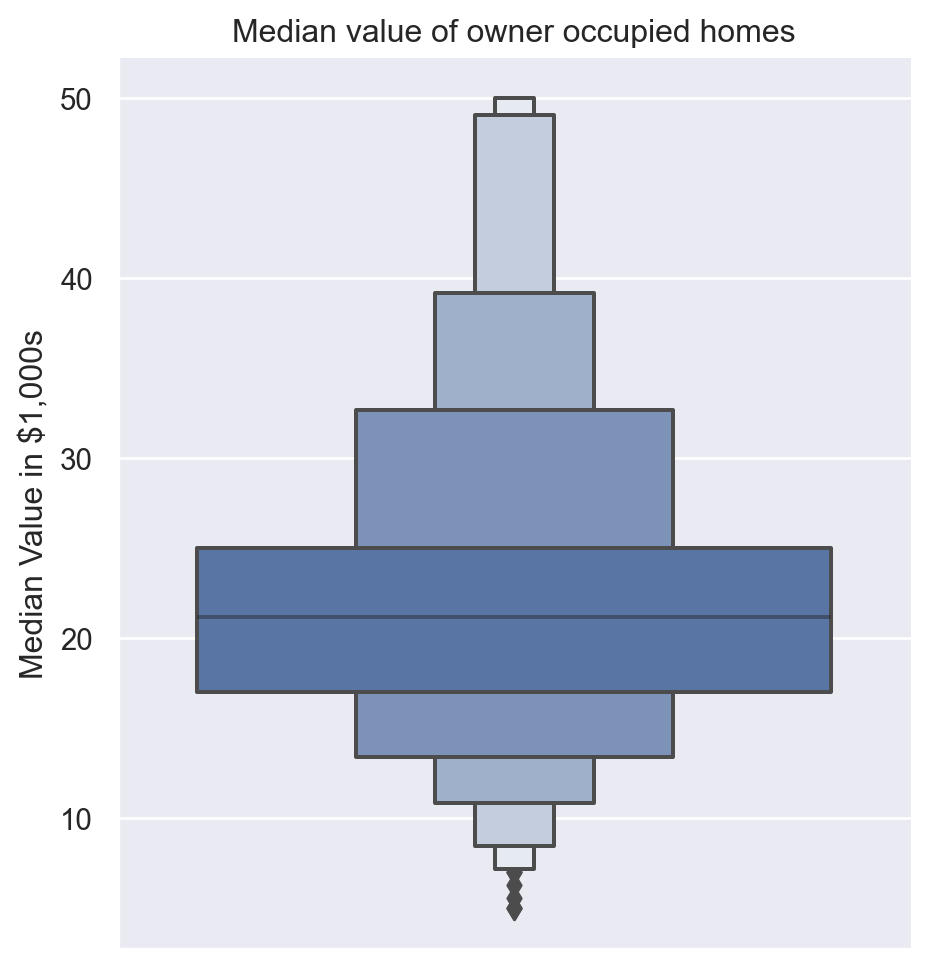

In [106]:
ax = sns.catplot(y='MEDV', data=boston_df, kind = "boxen")
plt.ylabel("Median Value in $1,000s")
plt.title("Median value of owner occupied homes")
plt.rcParams.update({"figure.dpi": 120})
plt.show()

<b>Figure 2.</b> This figure displays the number of homes bounded by the Charles River.

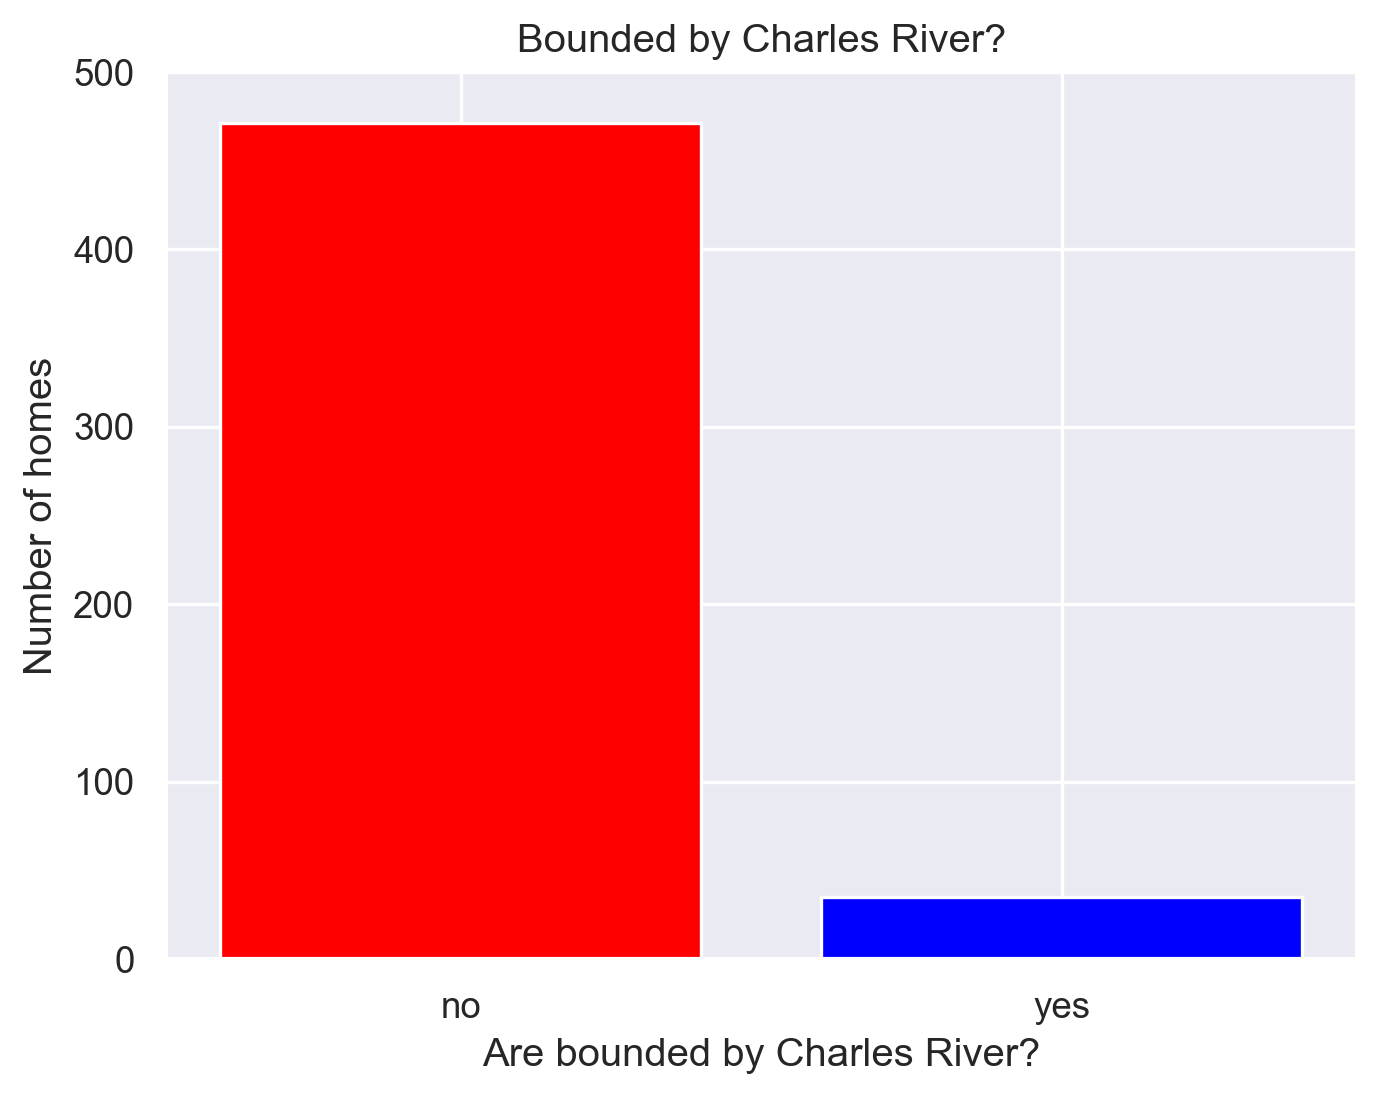

In [107]:
plt.bar(boston_df.CHAS.unique(), boston_df.CHAS.value_counts(), tick_label =['no', 'yes'], color =['red', 'blue'])
plt.ylim(top=500, bottom =0)
plt.xlabel('Are bounded by Charles River?')
plt.ylabel('Number of homes')
plt.title('Bounded by Charles River?')
plt.rcParams.update({"figure.dpi": 120})
plt.show()

<b>Figure 3.</b> This figure displays a comparison of the Median Value of owner-occupied units divided into three age groups: 35 years or newer, between 35 and 70 years old, and 70 years or older.

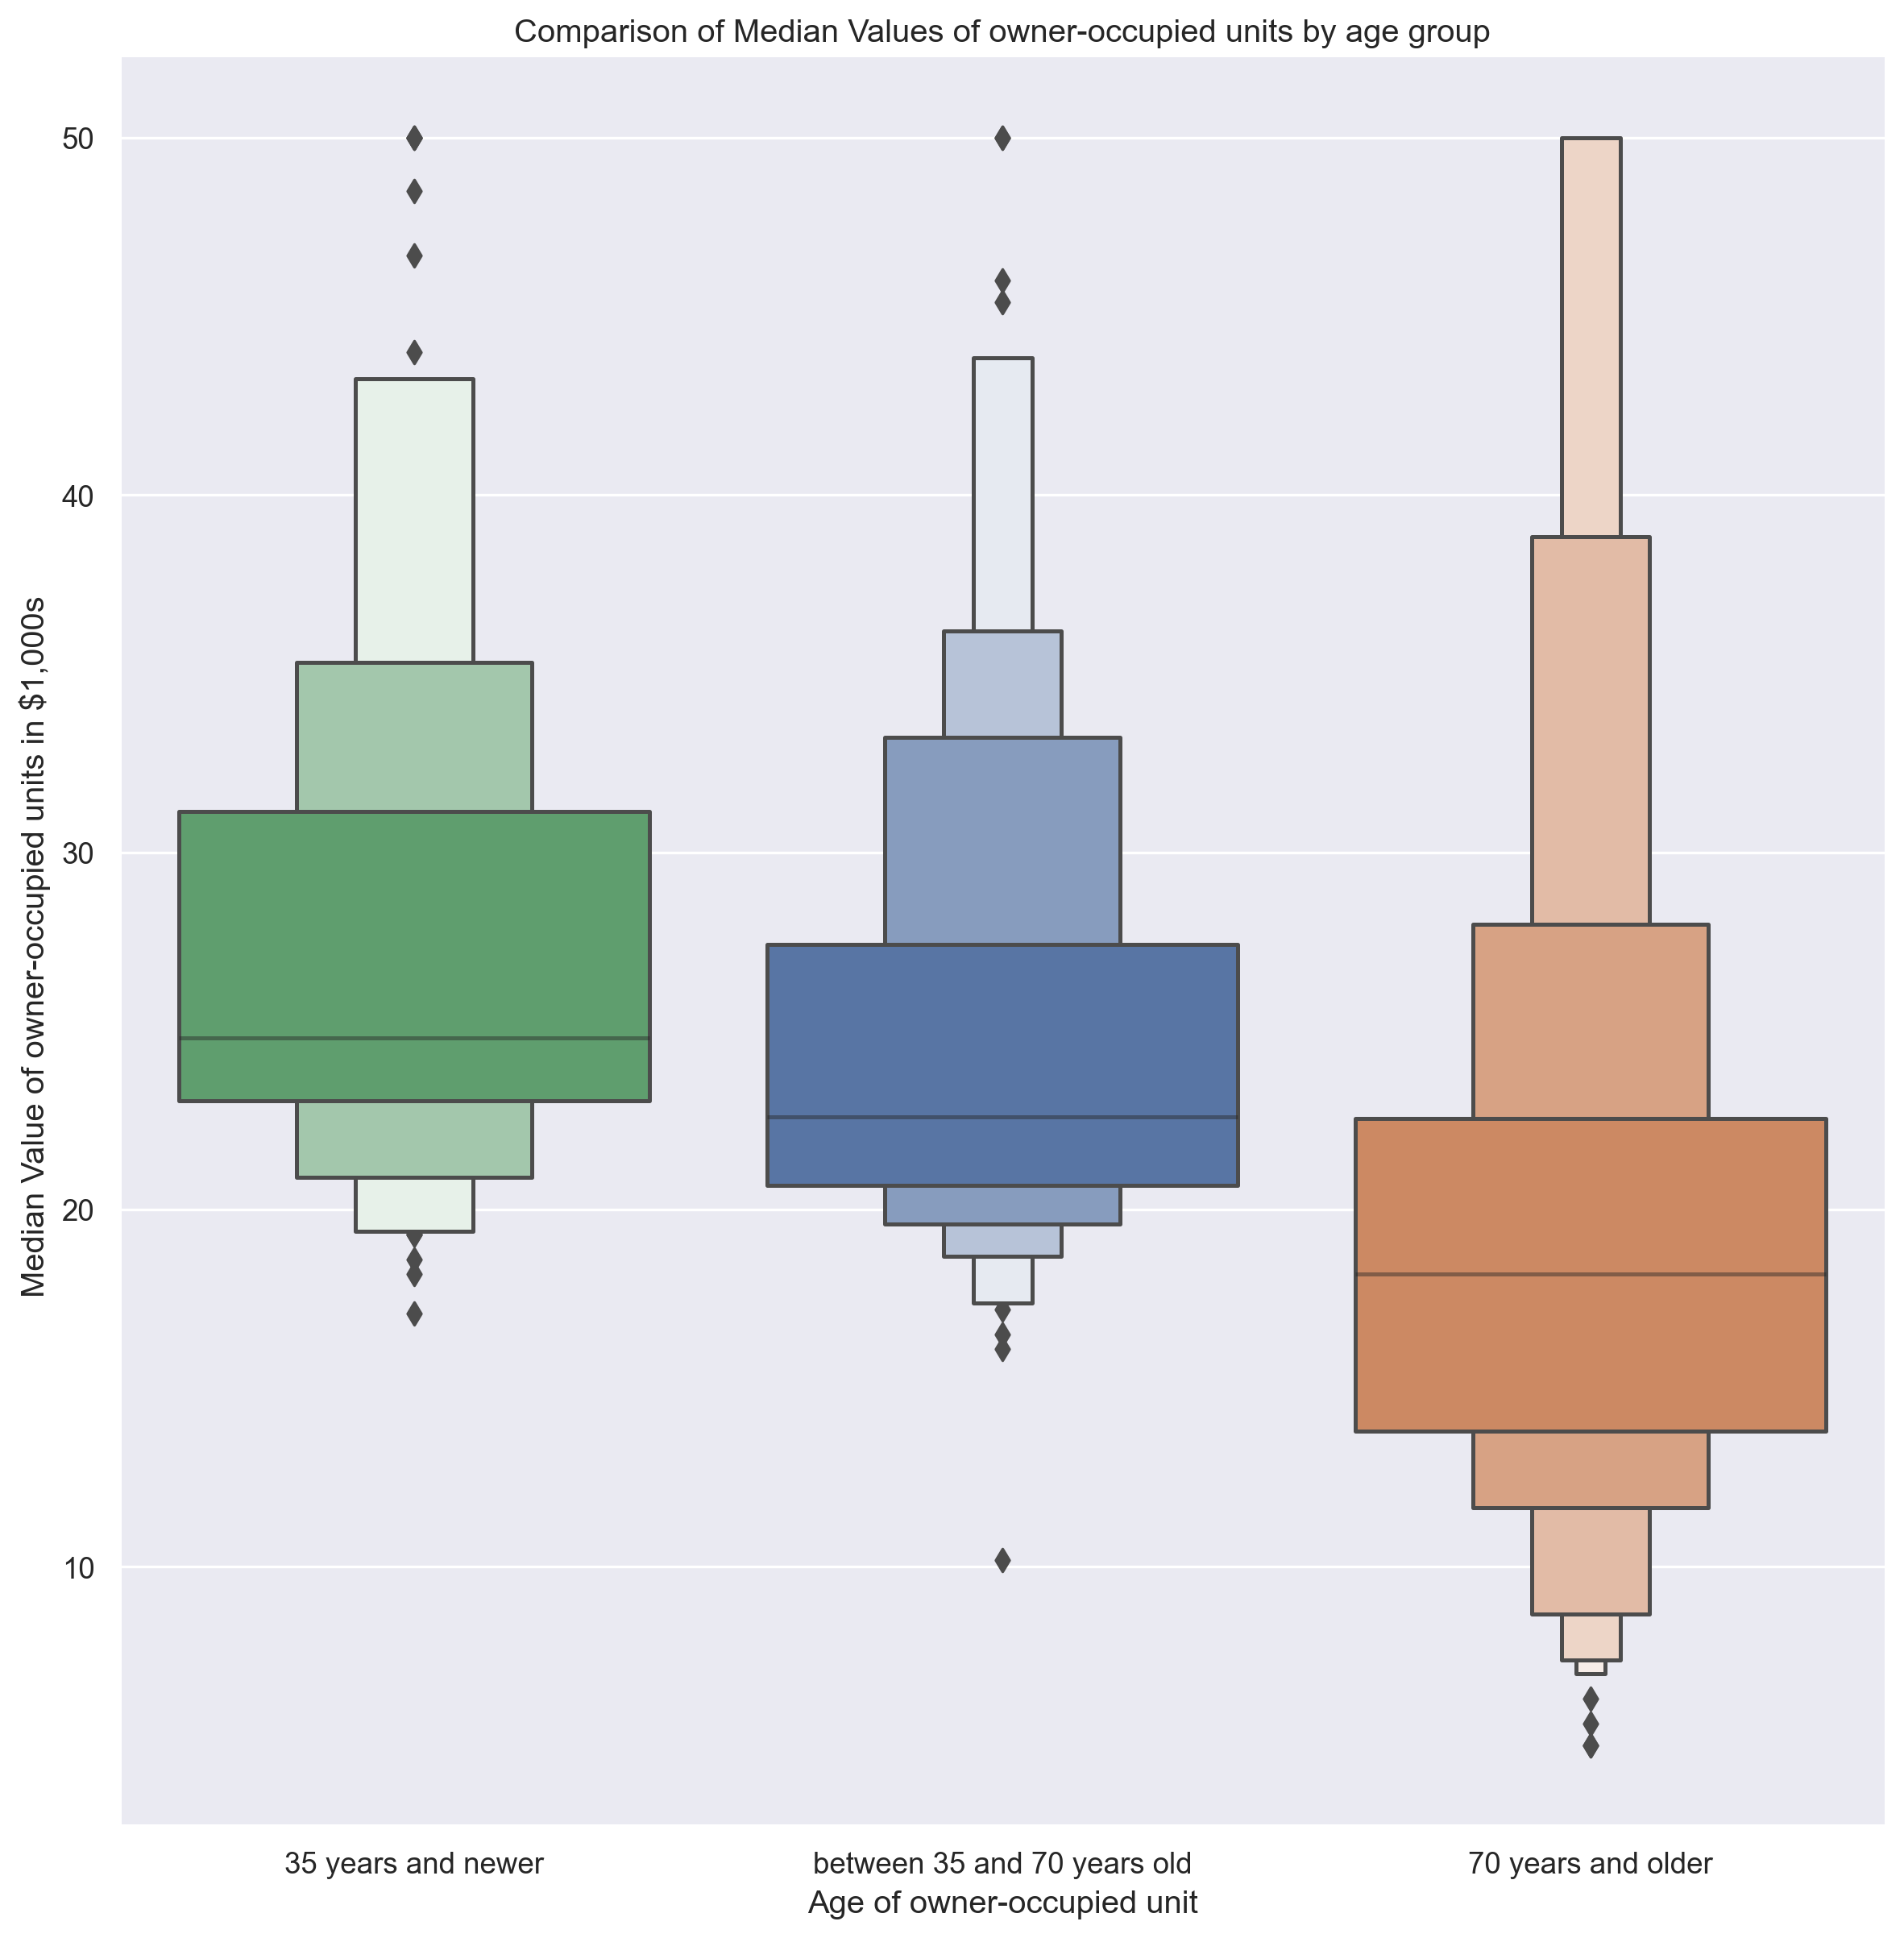

In [108]:
ax = sns.catplot(data=boston_df, x="age_group", y="MEDV", hue="age_group", kind="boxen", order=["35 years and newer", "between 35 and 70 years old", "70 years and older"], height = 10, aspect= 1, dodge=False)
plt.ylabel("Median Value of owner-occupied units in $1,000s ")
plt.xlabel("Age of owner-occupied unit")
plt.title("Comparison of Median Values of owner-occupied units by age group")
plt.show()

<b>Figure 4.</b> An illustration of the relationship between nitric oxide concentrations and the proportions of non-retail business acres (industry) per acre.

<i>Nitric oxide and safety</i>: Nitric oxide (NO) is a colorless gas and is an oxide of nitrogen. OSHA and NIOSH has set the legal limit for nitric oxide exposure at 25 ppm (30.69 mg/m<super>3</super>)  in any given 8-hour workday. 100 ppm (122.74 mg/m<super>3</super>) or more may be potentially dangerous or fatal. <a href ="https://www.cdc.gov/niosh/npg/npgd0448.html">NIOSH reccomendations</a>

<b>Figure 5.</b>

<hr>
<center><h3> Task 5 Answers</h3></center>
<h4>Next, there are four questions that must be answered based on the data, and preferably by using the follow tests identified in parenthesis after the question:</h4>
    
1. Is there a significant difference in median value of houses bounded by the Charles River or not? (T-test for independent samples)

2. Is there a difference in Median values of houses (MEDV) for each proportion of owner occupied units built prior to 1940 (AGE)? (ANOVA)

3. Can we conclude that there is no relationship between Nitric oxide concentrations and proportion of non-retail business acres per town? (Pearson Correlation)

4. What is the impact of an additional weighted distance  to the five Boston employment centers on the Median Value (MEDV) of owner occupied homes? (Regression analysis)
    
 

<hr>
<h3> Question 1: Is there a significant difference in Median Value (MEDV) of houses bounded by the Charles River (CHAS) or not?</h3>

<i>The null hypothesis is:</i>
<br>
<b>H_0 = µ_1 = µ_2</b> - There is no signifcant difference in the Median Value of houses bounded by the Charles River.
<p>
<i>The Alternative hypothesis is:</i>
<br>
<b>H_0 = µ_1 != µ_2</b> - There is a significant difference in the Median Value of houses bounded by the Charles River.

In [109]:
sci.ttest_ind(boston_df[boston_df['CHAS'] == '0']['MEDV'],
             boston_df[boston_df['CHAS'] == '1']['MEDV'], equal_var = True)

Ttest_indResult(statistic=nan, pvalue=nan)

<hr>
<h3>Question 2: Is there a difference in Median values of houses (MEDV) for each proportion of owner occupied units built prior to 1940 (AGE)?</h3>
<p>
For the purposes of this question, the owner-occupied units are divided into three age groups: 35 years and newer, between 35 and 70 years old, and 70 years or older.
<p>
<p>
    <i>The null hypothesis is:</i><br>
<b>H_0: µ_1 = µ_2 = µ_3</b> - There would be no significant variation in the Median Value of homes by their ages.
<p>
    <i>The alternative hypothesis is:</i><br>
<b>H_1: µ_1 != µ_2 OR µ_2 != µ_3 OR µ_3 != µ_1 </b> - There will be a significant variation between the Median Value in at least one of the age groups compared to the other two or all three age groups will show different Median Values.

Run a one-way ANOVA using the three age group samples:

In [110]:
#Now run that one-way ANOVA based on the information in Figure 3 above.
f_statistic, p_value = sci.f_oneway(thirtyfive_lower, thirtyfive_seventy, seventy_older)
print("F_Statistic: {0}, P-Value: {.05}".format(f_statistic,p_value))

c:\Users\hpelg\AppData\Local\Programs\Python\Python311\Lib\site-packages\scipy\stats\_stats_py.py:3861: DegenerateDataWarning: at least one input has length 0
  warnings.warn(stats.DegenerateDataWarning('at least one input '


ValueError: cannot switch from manual field specification to automatic field numbering

<hr>
<h3>Question 3: Can we conclude that there is no relationship between Nitric oxide concentrations and proportion of non-retail business acres per town?</h3>
<p>
This question deals with concentrations of the common free radical, Nitric Oxide (NO). As mentioned in Figure 4, this gas can be toxic in certain concentrations.
<p>
<p>
    <i>The null hypothesis is:</i><br>
<b>H_0:</b> There is no relationship between Nitric oxide concentrations and proportions of non-retail business acres per town.
<p>
    <i>The alternative hypothesis is:</i><br>
<b>H_1:</b> There is a relationship between Nitric oxide concentrations and proportions of non-retail business acres per town.

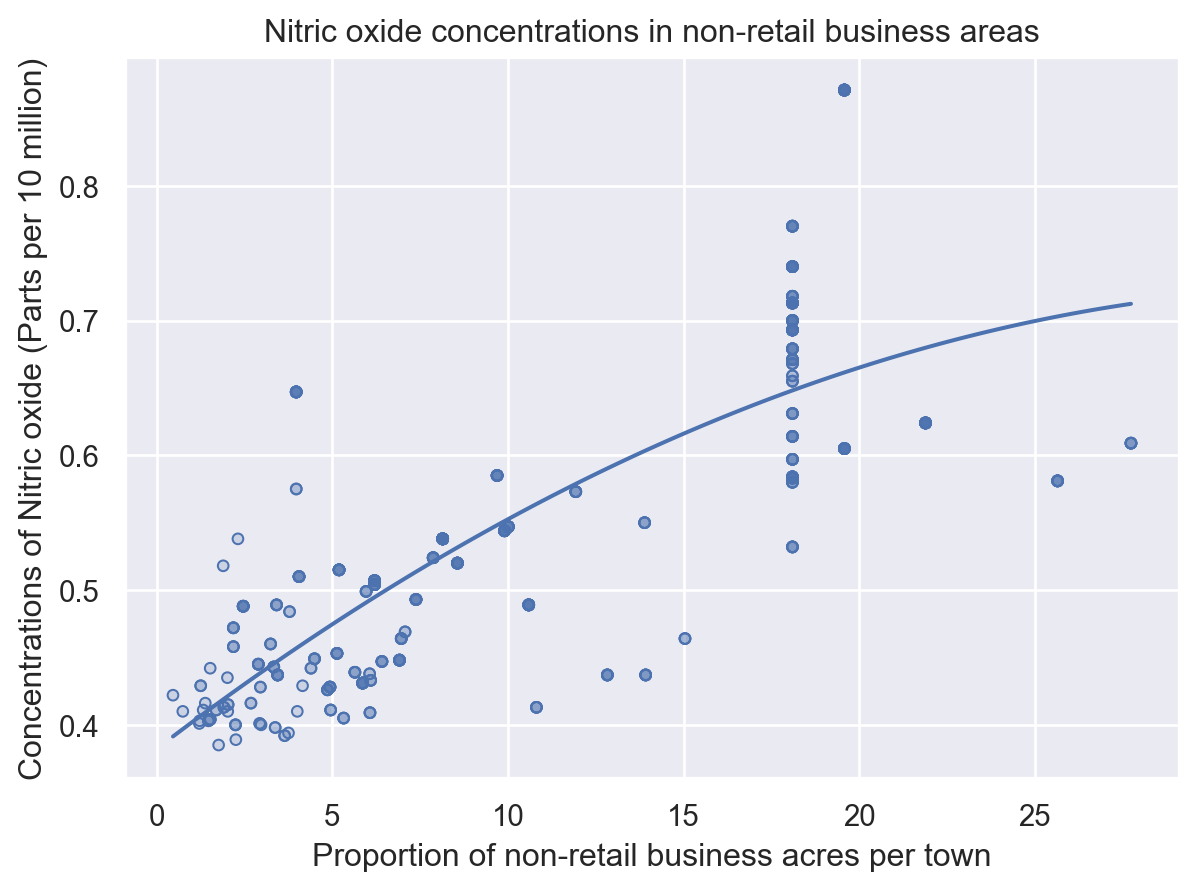

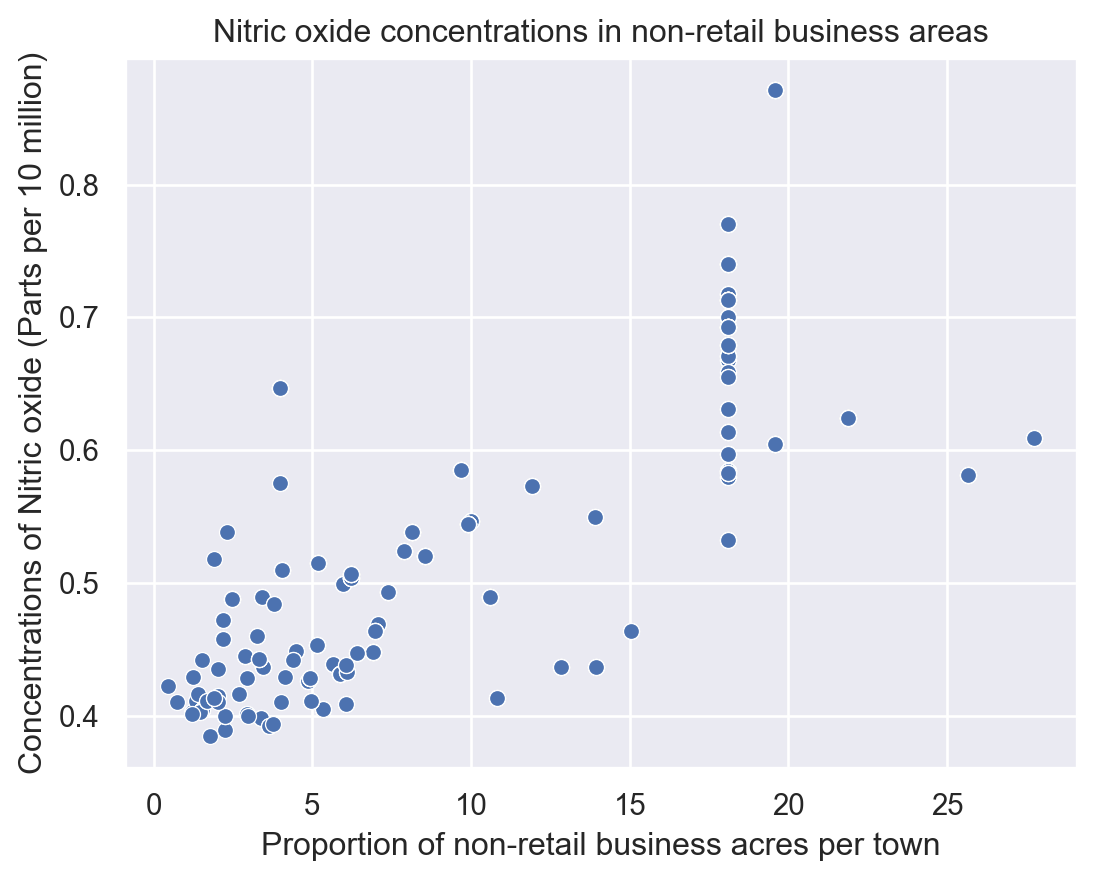

In [ ]:
ax = sns.scatterplot(x = "INDUS", y="NOX", data=boston_df)
plt.xlabel("Proportion of non-retail business acres per town")
plt.ylabel("Concentrations of Nitric oxide (Parts per 10 million)")
plt.title("Nitric oxide concentrations in non-retail business areas")
(so.Plot(data=boston_df, x="INDUS", y="NOX")
 .add(so.Dots())
 .add(so.Line(), so.PolyFit(order=2, gridsize=100))
 .label(
    x="Proportion of non-retail business acres per town", y = "Concentrations of Nitric oxide (Parts per 10 million)",
    color = str.capitalize,
    title = "Nitric oxide concentrations in non-retail business areas"
 )
)

In [ ]:
sci.pearsonr(boston_df["INDUS"], boston_df["NOX"])

PearsonRResult(statistic=0.7636514469209157, pvalue=7.913361061233745e-98)

<b>Conclusion:</b> The Pearson Coefficient of 0.76 suggests a strong relationship between the Nitric oxide concentrations of and proportion of non-retail business acres per town. With this as well as a p-value that is to the -98th power, the null hypothesis must rejected.

<hr>
<h3>Question 4: What is the impact of an additional Weighted Distance to the five Boston employment centers (DIS) on the Median Value (MEDV) of owner-occupied homes?</h3>

<b>H_0 :β1 = 0</b>  - Weighted Distance to the five Boston employment centers will have no impact on the Median Value of owner-occupied homes.
<br><b>H_1 :β1 != 0</b>  - Weighted Disance to the five Boston employment centers will have an impact on the Median Value of owner-occupied homes.

In [ ]:
# We will input the weighted distance from the Boston employment centers (DIS) as our independent variable.
X = boston_df['DIS']
# Next, we have the home median home value for  owner-occupied homes (MEDV) as our dependent variable. 
y=boston_df['MEDV']
# We add the intercept (beta_0) to the model
X = sm.add_constant(X)

# We put the last bits of statsmodel's coding magic making sure both our variables are represented and that we have our prediction based on the independent variable.
model = sm.OLS(y, X).fit()
predictions = model.predict(X)

# Print out the summary to see if it worked!
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   MEDV   R-squared:                       0.062
Model:                            OLS   Adj. R-squared:                  0.061
Method:                 Least Squares   F-statistic:                     33.58
Date:                Wed, 01 Feb 2023   Prob (F-statistic):           1.21e-08
Time:                        21:09:46   Log-Likelihood:                -1823.9
No. Observations:                 506   AIC:                             3652.
Df Residuals:                     504   BIC:                             3660.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         18.3901      0.817     22.499      0.000      16.784      19.996
DIS            1.0916      0.188      5.795      0.000       0.722       1.462
==============================================================================
Omnibus:                      139.779   Durbin-Watson:                   0.570
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              305.104
Skew:                           1.466   Prob(JB):                     5.59e-67
Kurtosis:                       5.424   Cond. No.                         9.32
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

<center><h2>Thank you for taking the time to read through my notebook!</h2>
<p>
<img src="https://bdc2020.o0bc.com/wp-content/uploads/2023/01/animal-rescue-league-boston-cats-kittens-Aurora-A283420_2-63d2b487c37fd-scaled.jpg" alt="A small Russian Blue kitten." height = "420" width = "630"> 
<br>
<i>Image by Animal Rescue League of Boston</i>
<p>
Little Auorora here is shocked you survived all the "maffs"!</center>